# PAA - Ordenação

## Setup

In [1]:
%pip install -r requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement bcc==0.29.1 (from versions: 0.1.7, 0.1.8, 0.1.10)
ERROR: No matching distribution found for bcc==0.29.1


### Importação

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil

## Criação dos valores a serem ordenados

In [3]:
qtd_values = [20_000, 40_000, 60_000]
dados = {
  'Ordem_crescente': [np.arange(1, qtd + 1) for qtd in qtd_values],
  'Ordem_decrescente': [np.arange(qtd, 0, -1) for qtd in qtd_values],
  'Ordem_aleatoria_pemutation': [np.random.permutation(qtd) for qtd in qtd_values]
}

### Exibindo amostragem


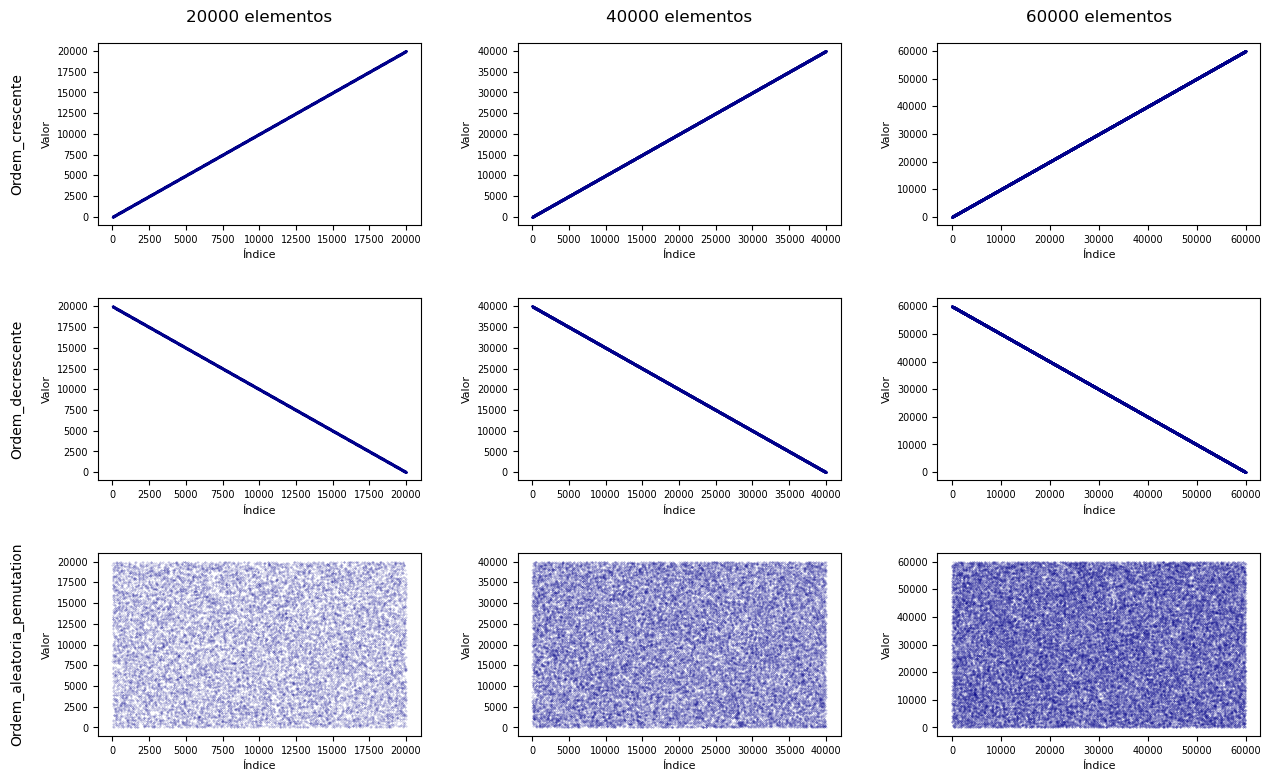

In [4]:
n_rows = len(dados)
n_cols = len(qtd_values)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5*n_cols, 3*n_rows))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for ax, qtd in zip(axs[0] if n_rows > 1 else axs, qtd_values):
    ax.set_title(f'{qtd} elementos', pad=15)

for row_idx, (ordem, valores) in enumerate(dados.items()):
    for col_idx, arr in enumerate(valores):
        ax = axs[row_idx, col_idx] if n_rows > 1 else axs[col_idx]
        x = np.arange(len(arr))
        ax.scatter(x, arr, s=0.1, alpha=0.3, color='darkblue')
        ax.set_xlabel('Índice', fontsize=8)
        ax.set_ylabel('Valor', fontsize=8)
        ax.tick_params(axis='both', labelsize=7)

    if n_rows > 1:
        axs[row_idx, 0].annotate(
            ordem,
            xy=(-0.25 if n_cols <=3 else -0.35, 0.5),
            xycoords='axes fraction',
            rotation=90,
            fontsize=10,
            ha='center',
            va='center'
        )
    else:
        axs[0].annotate(
            ordem,
            xy=(-0.25 if n_cols <=3 else -0.35, 0.5),
            xycoords='axes fraction',
            rotation=90,
            fontsize=10,
            ha='center',
            va='center'
        )

plt.show()

### Salvando amostragem em txt

In [5]:
paths = []

shutil.rmtree('files', ignore_errors=True)
os.makedirs('files', exist_ok=True)

for title, values in dados.items():
    for i, value in enumerate(values):
        path = f'files/{title}/{len(value)}.csv'
        paths.append(path)
        
        os.makedirs(os.path.dirname(path), exist_ok=True)
        
        df = pd.DataFrame(value)
        df.to_csv(path, index=False, header=False)
        
print(f'Arquivos salvos em {os.path.abspath("files")}')

Arquivos salvos em c:\Users\jonas\Documents\Codigos Curso\PAA\Trabalho 1 - PAA\files


## Block Sorting

O tipo de bloco é um algoritmo de classificação que classifica um array dividindo-o em blocos de tamanho fixo, classificando cada bloco individualmente e, em seguida, mesclando os blocos classificados de volta em uma única matriz ordenada. O Block sort é uma boa opção para classificar grandes conjuntos de dados que não cabem na memória. Ele pode classificar eficientemente os dados em blocos que se encaixam na memória e, em seguida, mesclar os blocos classificados juntos para obter a matriz ordenada final.



### Executando o algoritmo para cada amostragem



In [25]:
%%capture results_block_sort
args = "BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0"
results = {}

for path in paths:
    print(f"Processando o arquivo: {path}")
    args_copy = args + f" FILE_PATH={path} SIZE_ARR={path.split('/')[-1].split('.')[0]}"
    print(f"Comando sendo executado: make -B block_sort {args_copy}")
    !make -B block_sort {args_copy}
    print(f"Arquivo {path} ordenado com sucesso!")

In [24]:
args = "BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0"
results = {}

for path in paths:
    print(f"Processando o arquivo: {path}")
    args_copy = args + f" FILE_PATH={path} SIZE_ARR={path.split('/')[-1].split('.')[0]}"
    print(f"Comando sendo executado: make -B block_sort {args_copy}")
    !make -B block_sort {args_copy}
    print(f"Arquivo {path} ordenado com sucesso!")


Processando o arquivo: files/Ordem_crescente/20000.csv
Comando sendo executado: make -B block_sort BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_crescente/20000.csv SIZE_ARR=20000
Arquivo files/Ordem_crescente/20000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_crescente/40000.csv
Comando sendo executado: make -B block_sort BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_crescente/40000.csv SIZE_ARR=40000


process_begin: CreateProcess(NULL, gcc ordenacao/block_sort.c -o block_sort, ...) failed.
make (e=2): The system cannot find the file specified.
make: *** [makefile:2: block_sort] Error 2


Arquivo files/Ordem_crescente/40000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_crescente/60000.csv
Comando sendo executado: make -B block_sort BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_crescente/60000.csv SIZE_ARR=60000


process_begin: CreateProcess(NULL, gcc ordenacao/block_sort.c -o block_sort, ...) failed.
make (e=2): The system cannot find the file specified.
make: *** [makefile:2: block_sort] Error 2


Arquivo files/Ordem_crescente/60000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_decrescente/20000.csv
Comando sendo executado: make -B block_sort BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_decrescente/20000.csv SIZE_ARR=20000


process_begin: CreateProcess(NULL, gcc ordenacao/block_sort.c -o block_sort, ...) failed.
make (e=2): The system cannot find the file specified.
make: *** [makefile:2: block_sort] Error 2


Arquivo files/Ordem_decrescente/20000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_decrescente/40000.csv
Comando sendo executado: make -B block_sort BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_decrescente/40000.csv SIZE_ARR=40000


process_begin: CreateProcess(NULL, gcc ordenacao/block_sort.c -o block_sort, ...) failed.
make (e=2): The system cannot find the file specified.
make: *** [makefile:2: block_sort] Error 2


Arquivo files/Ordem_decrescente/40000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_decrescente/60000.csv
Comando sendo executado: make -B block_sort BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_decrescente/60000.csv SIZE_ARR=60000


process_begin: CreateProcess(NULL, gcc ordenacao/block_sort.c -o block_sort, ...) failed.
make (e=2): The system cannot find the file specified.
make: *** [makefile:2: block_sort] Error 2


Arquivo files/Ordem_decrescente/60000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_aleatoria_pemutation/20000.csv
Comando sendo executado: make -B block_sort BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_aleatoria_pemutation/20000.csv SIZE_ARR=20000


process_begin: CreateProcess(NULL, gcc ordenacao/block_sort.c -o block_sort, ...) failed.
make (e=2): The system cannot find the file specified.
make: *** [makefile:2: block_sort] Error 2


Arquivo files/Ordem_aleatoria_pemutation/20000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_aleatoria_pemutation/40000.csv
Comando sendo executado: make -B block_sort BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_aleatoria_pemutation/40000.csv SIZE_ARR=40000


process_begin: CreateProcess(NULL, gcc ordenacao/block_sort.c -o block_sort, ...) failed.
make (e=2): The system cannot find the file specified.
make: *** [makefile:2: block_sort] Error 2
process_begin: CreateProcess(NULL, gcc ordenacao/block_sort.c -o block_sort, ...) failed.
make (e=2): The system cannot find the file specified.
make: *** [makefile:2: block_sort] Error 2


Arquivo files/Ordem_aleatoria_pemutation/40000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_aleatoria_pemutation/60000.csv
Comando sendo executado: make -B block_sort BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_aleatoria_pemutation/60000.csv SIZE_ARR=60000


process_begin: CreateProcess(NULL, gcc ordenacao/block_sort.c -o block_sort, ...) failed.
make (e=2): The system cannot find the file specified.
make: *** [makefile:2: block_sort] Error 2


Arquivo files/Ordem_aleatoria_pemutation/60000.csv ordenado com sucesso!


In [26]:
print(results_block_sort.stdout)

Processando o arquivo: files/Ordem_crescente/20000.csv
Comando sendo executado: make -B block_sort BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_crescente/20000.csv SIZE_ARR=20000
Arquivo files/Ordem_crescente/20000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_crescente/40000.csv
Comando sendo executado: make -B block_sort BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_crescente/40000.csv SIZE_ARR=40000
Arquivo files/Ordem_crescente/40000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_crescente/60000.csv
Comando sendo executado: make -B block_sort BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_crescente/60000.csv SIZE_ARR=60000
Arquivo files/Ordem_crescente/60000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_decrescente/20000.csv
Comando sendo executado: make -B block_sort BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_decrescente/20000.csv SIZE_ARR=20000
Arquivo files/Ordem_decrescente/20000.csv ordenado

# Radix Sort

In [19]:
%%capture results_radix_sort
args = "SHOW_VECTOR_RESULT=0"
results = {}

for path in paths:
    print(f"Processando o arquivo: {path}")
    args_copy = args + f" FILE_PATH={path} SIZE_ARR={path.split('/')[-1].split('.')[0]}"
    print(f"Comando sendo executado: make -B radix_sort {args_copy}")
    !make -B radix_sort {args_copy}
    print(f"Arquivo {path} ordenado com sucesso!")

In [20]:
args = "SHOW_VECTOR_RESULT=0"
results = {}

for path in paths:
    print(f"Processando o arquivo: {path}")
    args_copy = args + f" FILE_PATH={path} SIZE_ARR={path.split('/')[-1].split('.')[0]}"
    print(f"Comando sendo executado: make -B radix_sort {args_copy}")
    !make -B radix_sort {args_copy}
    print(f"Arquivo {path} ordenado com sucesso!")

Processando o arquivo: files/Ordem_crescente/20000.csv
Comando sendo executado: make -B radix_sort SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_crescente/20000.csv SIZE_ARR=20000
Arquivo files/Ordem_crescente/20000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_crescente/40000.csv
Comando sendo executado: make -B radix_sort SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_crescente/40000.csv SIZE_ARR=40000


process_begin: CreateProcess(NULL, gcc ordenacao/radix_sort.c -o radix_sort, ...) failed.
make (e=2): The system cannot find the file specified.
make: *** [makefile:6: radix_sort] Error 2


Arquivo files/Ordem_crescente/40000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_crescente/60000.csv
Comando sendo executado: make -B radix_sort SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_crescente/60000.csv SIZE_ARR=60000


process_begin: CreateProcess(NULL, gcc ordenacao/radix_sort.c -o radix_sort, ...) failed.
make (e=2): The system cannot find the file specified.
make: *** [makefile:6: radix_sort] Error 2


Arquivo files/Ordem_crescente/60000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_decrescente/20000.csv
Comando sendo executado: make -B radix_sort SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_decrescente/20000.csv SIZE_ARR=20000


process_begin: CreateProcess(NULL, gcc ordenacao/radix_sort.c -o radix_sort, ...) failed.
make (e=2): The system cannot find the file specified.
make: *** [makefile:6: radix_sort] Error 2
process_begin: CreateProcess(NULL, gcc ordenacao/radix_sort.c -o radix_sort, ...) failed.
make (e=2): The system cannot find the file specified.
make: *** [makefile:6: radix_sort] Error 2


Arquivo files/Ordem_decrescente/20000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_decrescente/40000.csv
Comando sendo executado: make -B radix_sort SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_decrescente/40000.csv SIZE_ARR=40000
Arquivo files/Ordem_decrescente/40000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_decrescente/60000.csv
Comando sendo executado: make -B radix_sort SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_decrescente/60000.csv SIZE_ARR=60000


process_begin: CreateProcess(NULL, gcc ordenacao/radix_sort.c -o radix_sort, ...) failed.
make (e=2): The system cannot find the file specified.
make: *** [makefile:6: radix_sort] Error 2


Arquivo files/Ordem_decrescente/60000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_aleatoria_pemutation/20000.csv
Comando sendo executado: make -B radix_sort SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_aleatoria_pemutation/20000.csv SIZE_ARR=20000


process_begin: CreateProcess(NULL, gcc ordenacao/radix_sort.c -o radix_sort, ...) failed.
make (e=2): The system cannot find the file specified.
make: *** [makefile:6: radix_sort] Error 2


Arquivo files/Ordem_aleatoria_pemutation/20000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_aleatoria_pemutation/40000.csv
Comando sendo executado: make -B radix_sort SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_aleatoria_pemutation/40000.csv SIZE_ARR=40000


process_begin: CreateProcess(NULL, gcc ordenacao/radix_sort.c -o radix_sort, ...) failed.
make (e=2): The system cannot find the file specified.
make: *** [makefile:6: radix_sort] Error 2


Arquivo files/Ordem_aleatoria_pemutation/40000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_aleatoria_pemutation/60000.csv
Comando sendo executado: make -B radix_sort SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_aleatoria_pemutation/60000.csv SIZE_ARR=60000


process_begin: CreateProcess(NULL, gcc ordenacao/radix_sort.c -o radix_sort, ...) failed.
make (e=2): The system cannot find the file specified.
make: *** [makefile:6: radix_sort] Error 2


Arquivo files/Ordem_aleatoria_pemutation/60000.csv ordenado com sucesso!


process_begin: CreateProcess(NULL, gcc ordenacao/radix_sort.c -o radix_sort, ...) failed.
make (e=2): The system cannot find the file specified.
make: *** [makefile:6: radix_sort] Error 2


In [27]:
print(results_radix_sort.stdout)

Processando o arquivo: files/Ordem_crescente/20000.csv
Comando sendo executado: make -B radix_sort SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_crescente/20000.csv SIZE_ARR=20000
Arquivo files/Ordem_crescente/20000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_crescente/40000.csv
Comando sendo executado: make -B radix_sort SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_crescente/40000.csv SIZE_ARR=40000
Arquivo files/Ordem_crescente/40000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_crescente/60000.csv
Comando sendo executado: make -B radix_sort SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_crescente/60000.csv SIZE_ARR=60000
Arquivo files/Ordem_crescente/60000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_decrescente/20000.csv
Comando sendo executado: make -B radix_sort SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_decrescente/20000.csv SIZE_ARR=20000
Arquivo files/Ordem_decrescente/20000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_dec

## Show values

In [30]:
def processing(output):
  data_processing = {}

  print(f"Saída do comando: {output.stdout}") # type: ignore
  
  for line in str(output.stdout).splitlines(): # type: ignore
    type_ = line.split('/')[1]
    temp = line.split(' ')[-1]
    qtd = line.split('/')[-1].split('.')[0]
    
    if not data_processing.get(type_):
      data_processing[type_] = {qtd: temp}
    else:
      data_processing[type_][qtd] = temp
      
  return data_processing

def plot_data(data_processing):
  plt.figure(figsize=(15, 5))
  plt.title('Análise de Tempo de Execução')
  plt.xlabel('Tamanho do vetor')
  plt.ylabel('Tempo (s)')
  for type_, data in data_processing.items():
      x = list(map(int, data.keys()))
      y = list(map(float, data.values()))
      plt.plot(x, y, label=type_, marker='o', markersize=5)
  plt.legend()
  plt.grid()
  plt.show()

### Exibindo amostragem do Block Sort

Saída do comando: Processando o arquivo: files/Ordem_crescente/20000.csv
Comando sendo executado: make -B block_sort BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_crescente/20000.csv SIZE_ARR=20000
Arquivo files/Ordem_crescente/20000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_crescente/40000.csv
Comando sendo executado: make -B block_sort BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_crescente/40000.csv SIZE_ARR=40000
Arquivo files/Ordem_crescente/40000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_crescente/60000.csv
Comando sendo executado: make -B block_sort BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_crescente/60000.csv SIZE_ARR=60000
Arquivo files/Ordem_crescente/60000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_decrescente/20000.csv
Comando sendo executado: make -B block_sort BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_decrescente/20000.csv SIZE_ARR=20000
Arquivo files/Ordem_decrescente/

ValueError: could not convert string to float: 'sucesso!'

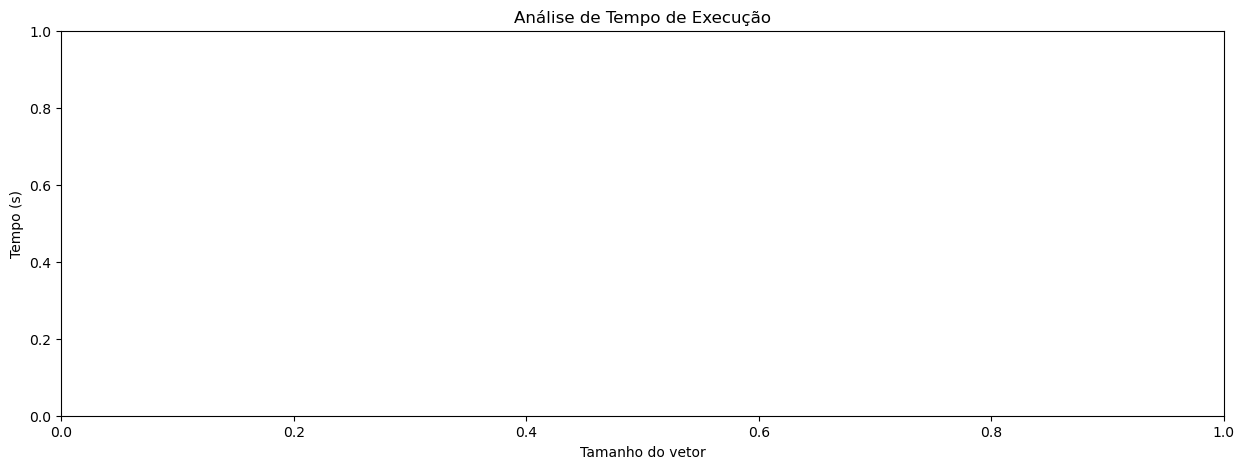

In [31]:
data_block = processing(results_block_sort)
plot_data(data_block)

### Exibindo amostragem do Radix Sort

Saída do comando: Processando o arquivo: files/Ordem_crescente/20000.csv
Comando sendo executado: make -B radix_sort SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_crescente/20000.csv SIZE_ARR=20000
Arquivo files/Ordem_crescente/20000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_crescente/40000.csv
Comando sendo executado: make -B radix_sort SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_crescente/40000.csv SIZE_ARR=40000
Arquivo files/Ordem_crescente/40000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_crescente/60000.csv
Comando sendo executado: make -B radix_sort SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_crescente/60000.csv SIZE_ARR=60000
Arquivo files/Ordem_crescente/60000.csv ordenado com sucesso!
Processando o arquivo: files/Ordem_decrescente/20000.csv
Comando sendo executado: make -B radix_sort SHOW_VECTOR_RESULT=0 FILE_PATH=files/Ordem_decrescente/20000.csv SIZE_ARR=20000
Arquivo files/Ordem_decrescente/20000.csv ordenado com sucesso!
Processando o arquiv

ValueError: could not convert string to float: 'sucesso!'

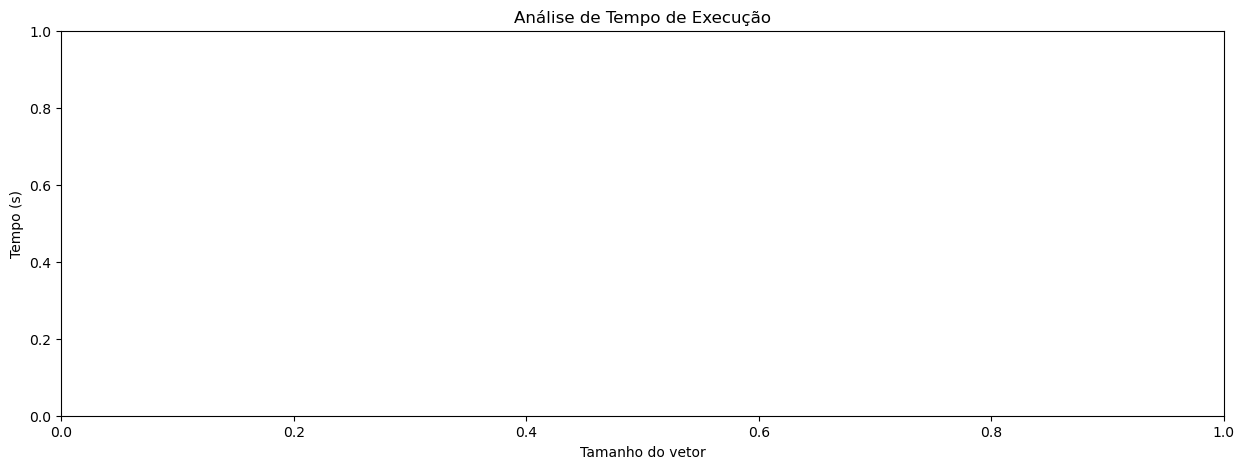

In [32]:
data_radix = processing(results_radix_sort)
plot_data(data_radix)

### Comparação entre os dois algoritmos

C:\Users\jonas\AppData\Local\Temp\ipykernel_12780\1765142979.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


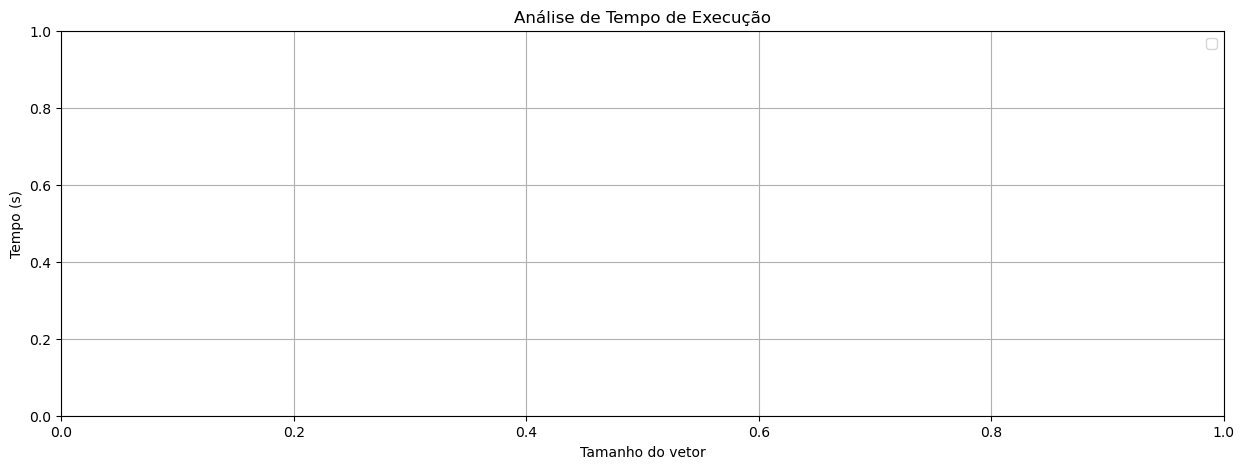

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Análise de Tempo de Execução')
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo (s)')

for type_, data in data_block.items():
    x = list(map(int, data.keys()))
    y = list(map(float, data.values()))
    plt.plot(x, y, label=f"block_{type_}", marker='o', markersize=5, color='orange')
    
for type_, data in data_radix.items():
    x = list(map(int, data.keys()))
    y = list(map(float, data.values()))
    plt.plot(x, y, label=f"radix_{type_}", marker='o', markersize=5, color='blue')
    
plt.legend()
plt.grid()
plt.show()
